# Финты ушами со счётом пар рядом стоящих буковок

In [56]:
words = open('data/names.txt', 'r').read().splitlines()

In [57]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [58]:
len(words)

32033

In [59]:
min(len(w) for w in words)

2

In [60]:
max(len(w) for w in words)

15

## Статистический метод


In [63]:
import torch

In [65]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [66]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [67]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1
    

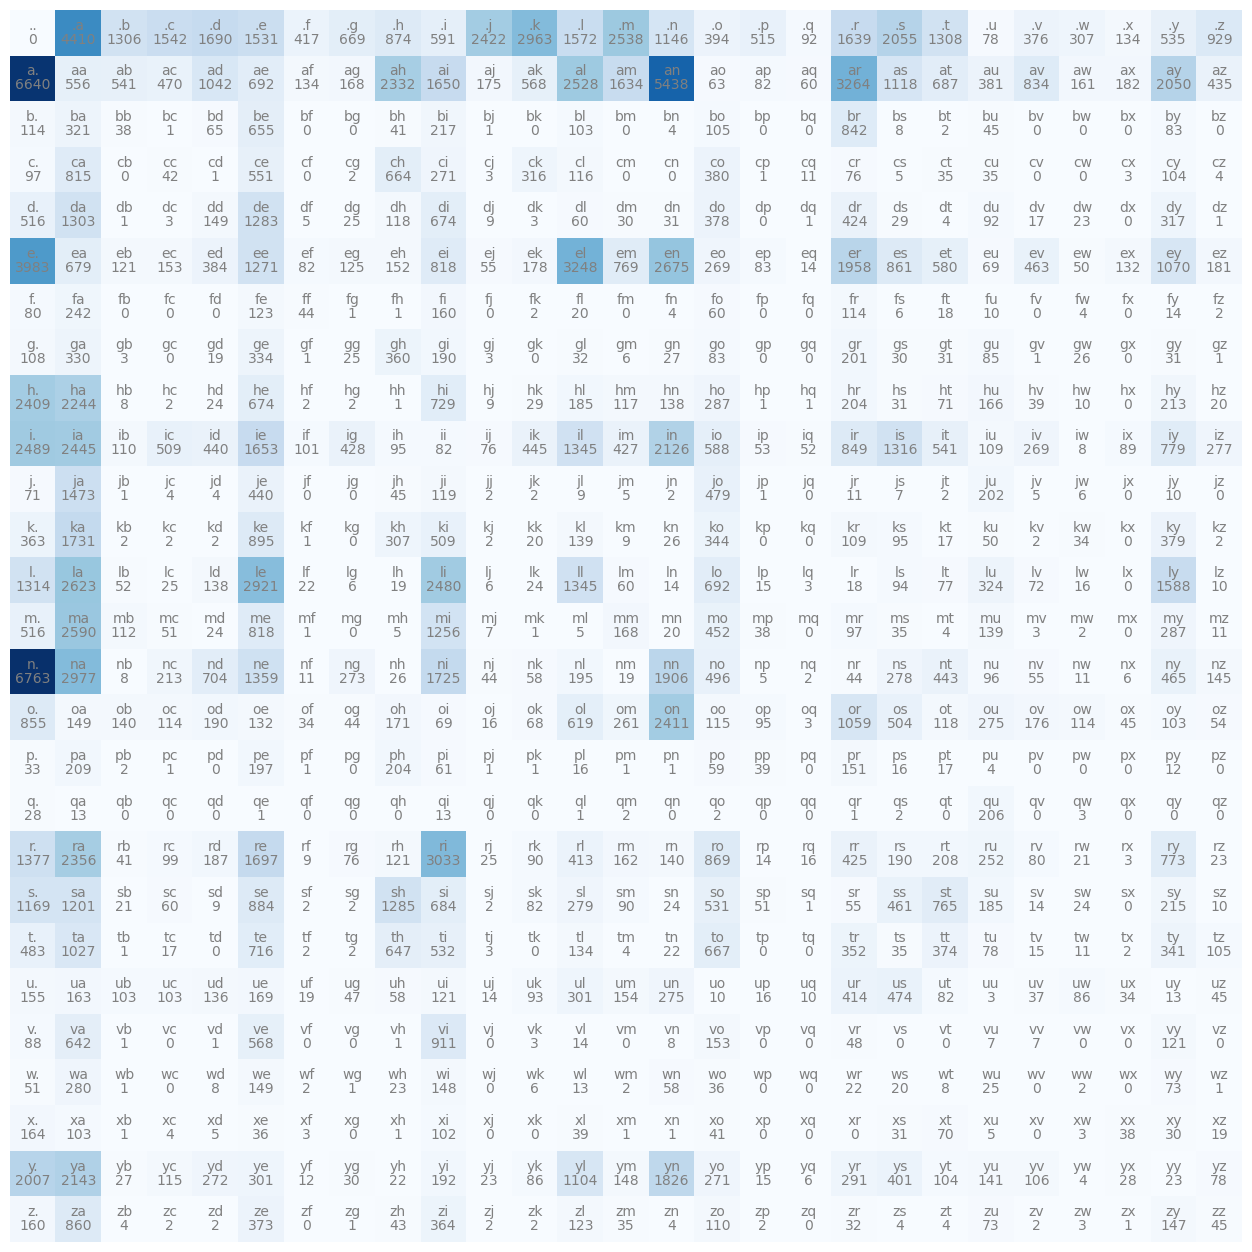

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [69]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [70]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [71]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'j'

In [72]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [73]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0,
        0, 1, 1, 1])

In [74]:
p.shape

torch.Size([3])

In [76]:
P = (N+1).float()
P /= P.sum(1, keepdims=True)

In [78]:
g = torch.Generator().manual_seed(2147483647)

for i in range(50):
  
  out = []
  ix = 0
  while True:
    p = P[ix]
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.
dgossmitan.
il.
le.
pann.
that.
janreli.
isa.
dyn.
rijelumemahaunayaleva.
cararr.
jen.
janarta.
maly.
abely.
a.
i.
lavadoni.
themielyawat.
f.
modam.
tavilitikiesaloeverin.
n.
e.
kalbrenelah.
anen.
ch.
k.
jan.
odridrdenanialilpergha.
tezralelia.


In [165]:
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

# log(a*b*c) = log(a) + log(b) + log(c)

In [435]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-564996.8125, grad_fn=<AddBackward0>)
nll=tensor(564996.8125, grad_fn=<NegBackward0>)
2.476470470428467


## Нейросетевой прикол

In [449]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)
    
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [450]:
xs

tensor([ 0,  5, 13, 13,  1])

In [451]:
ys

tensor([ 5, 13, 13,  1,  0])

In [487]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [488]:
xenc.shape

torch.Size([5, 27])

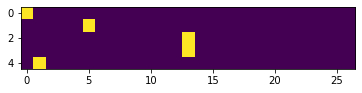

In [489]:
plt.imshow(xenc)

In [490]:
xenc.dtype

torch.float32

In [493]:
W = torch.randn((27, 1))
xenc @ W

tensor([[-0.2003, -2.3711, -0.9466,  0.5369, -0.0949, -1.7872, -0.9038,  0.8194,
          0.6926,  0.0114, -1.5301,  0.6077, -1.2056,  1.8605, -1.3012, -0.0301,
         -2.1611, -0.0538, -0.0133, -0.3629,  0.5254, -0.0080,  1.1602,  1.9851,
          0.4976,  0.7351, -0.6373],
        [-0.4422,  0.5024,  1.3514, -0.4085, -0.7854, -1.2568, -0.4558,  0.1466,
         -0.4460,  1.2748, -0.6367,  0.6403, -0.5617, -0.3060,  1.6771, -1.4814,
         -2.7395,  0.3876,  0.3970,  1.5577, -0.1995, -0.1397, -1.3045,  0.4294,
          1.2557,  0.8007,  0.5450],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160,
         -2.2721,  0.9713, -1.0734,  0.3115, -0.2506,  0.0757,  0.9332,  1.6536,
          1.2306,  0.1231, -0.2530],
        [-0.2680, -0.2640,  0.4591,  0.0338,  0.7478,  1.2757, -0.9842,  0.1799,
          0.0824, -0.5646, -0.3657, -0.8358, -1.7654,  0.5008, -1.7455, -0.8160

In [506]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
         0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
         0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132],
        [0.0154, 0.0397, 0.0928, 0.0160, 0.0110, 0.0068, 0.0152, 0.0278, 0.0154,
         0.0860, 0.0127, 0.0456, 0.0137, 0.0177, 0.1286, 0.0055, 0.0016, 0.0354,
         0.0357, 0.1141, 0.0197, 0.0209, 0.0065, 0.0369, 0.0844, 0.0535, 0.0414],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0212, 0.0213, 0.0439, 0.0287, 0.0586, 0.0994, 0.0104, 0.0332, 0.0301,
         0.0158, 0.0192, 0.0120, 0.0047, 0.0458, 0.0048, 0.0123, 0.0029, 0.0733,
         0.0095, 0.0379, 0.0216, 0.0299, 0.0705, 0.1450, 0.0950, 0.0314, 0.0215],
        [0.0289, 0.0077,

In [509]:
probs[0]

tensor([0.0205, 0.0023, 0.0097, 0.0428, 0.0228, 0.0042, 0.0101, 0.0568, 0.0500,
        0.0253, 0.0054, 0.0460, 0.0075, 0.1609, 0.0068, 0.0243, 0.0029, 0.0237,
        0.0247, 0.0174, 0.0423, 0.0248, 0.0799, 0.1822, 0.0412, 0.0522, 0.0132])

In [510]:
probs[0].shape

torch.Size([27])

In [507]:
probs[0].sum()

tensor(1.)

In [ ]:
# (5, 27) @ (27, 27) -> (5, 27)

In [ ]:
# SUMMARY ------------------------------>>>>

In [528]:
xs

tensor([ 0,  5, 13, 13,  1])

In [529]:
ys

tensor([ 5, 13, 13,  1,  0])

In [557]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [558]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [559]:
probs.shape

torch.Size([5, 27])

In [560]:

nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [561]:
# --------- !!! OPTIMIZATION !!! yay --------------

In [565]:
xs

tensor([ 0,  5, 13, 13,  1])

In [566]:
ys

tensor([ 5, 13, 13,  1,  0])

In [580]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [602]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), ys].log().mean()

In [603]:
print(loss.item())

3.6891887187957764


In [604]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [605]:
W.data += -0.1 * W.grad

In [606]:
# --------- !!! OPTIMIZATION !!! yay, but this time actually --------------

In [682]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [716]:
# gradient descent
for k in range(1):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.481828451156616


In [725]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


## Провернём такой же финт ушами, но с русскими именами

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/nik1m/Desktop/data.csv")


In [39]:
names = sorted(set([str(s).lower() for s in df.iloc[:, 1]]))

45200

In [40]:
len(names)

45200

In [43]:
allowed_chars = set([chr(w) for w in range(ord('а'), ord('я')+1)])
# удаляем все имена с непонятными символами
filtered_names = [word for word in names if all(char in allowed_chars for char in word)]
# удаляем все имена, в которых дофига одинаковых букв подряд
filtered_names2 = list()
for name in filtered_names:
    counter = 1
    chr0 = name[0]
    delete_flg = 0
    
    for i in range(1, len(name)):
        chr1 = name[i]
        if chr0 == chr1:
            counter += 1
        else:
            counter = 1
        
        chr0 = chr1
        if counter >= 3:
            delete_flg = 1

    if delete_flg == 0:
        filtered_names2.append(name)



In [45]:
filtered_names2
ru_names = [name for name in filtered_names2 if len(name) >= 2]

In [54]:
print(len(ru_names))

with open("russian_names.txt", "w", encoding='utf-8') as f:
    for name in names:
        f.write(name + "\n")


44163


### Применение модели bigram на русских именах

In [89]:
f = open("data/russian_names.txt", "r", encoding='utf-8')
ru_names = f.read().splitlines()
f.close()
ru_names[:10]

['аазат',
 'аалександр',
 'аалександра',
 'аалександрнд',
 'аамир',
 'аана',
 'аантолий',
 'аараби',
 'аарне',
 'аарон']

In [123]:
letters = ['.'] + sorted(list(set(''.join(ru_names))))
letters[:10]

['.', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и']

In [122]:
stoi = {s:i for i,s in enumerate(letters)}
itos = {s:i for i,s in stoi.items()}

In [126]:
N = torch.ones(len(letters)+1, len(letters)+1, dtype=torch.int32) # уже вместе со сглаживанием
N

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.int32)

In [127]:
for word in ru_names:
    name = '.' + word + '.'
    for ch1, ch2 in zip(name, name[1:]):
        ind1 = stoi[ch1]
        ind2 = stoi[ch2]
        N[ind1, ind2] += 1

N

tensor([[   1, 5705, 1621,  ...,  298,  318,    1],
        [9239,  187, 1763,  ...,   53,  308,    1],
        [ 276, 1883,   78,  ...,   21,   70,    1],
        ...,
        [  36,    7,   83,  ...,    3,    4,    1],
        [3575,   31,   47,  ...,    2,   13,    1],
        [   1,    1,    1,  ...,    1,    1,    1]], dtype=torch.int32)


In [134]:
N[1] / N[1].sum()

tensor([1.8612e-01, 3.7671e-03, 3.5516e-02, 2.7820e-02, 2.3489e-02, 4.8711e-02,
        3.1225e-03, 4.7139e-03, 2.4053e-02, 1.7869e-02, 4.5488e-02, 2.2220e-02,
        8.1164e-02, 5.8259e-02, 1.2875e-01, 1.5512e-03, 6.1241e-03, 1.0073e-01,
        3.3542e-02, 6.1805e-02, 7.5544e-03, 1.4847e-02, 3.9464e-02, 8.4609e-04,
        2.6591e-03, 9.5286e-03, 1.6116e-04, 1.3094e-03, 1.4102e-04, 5.0363e-04,
        8.8638e-04, 1.0677e-03, 6.2047e-03, 2.0145e-05])

In [139]:
# готовое распределение 
P = N / N.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

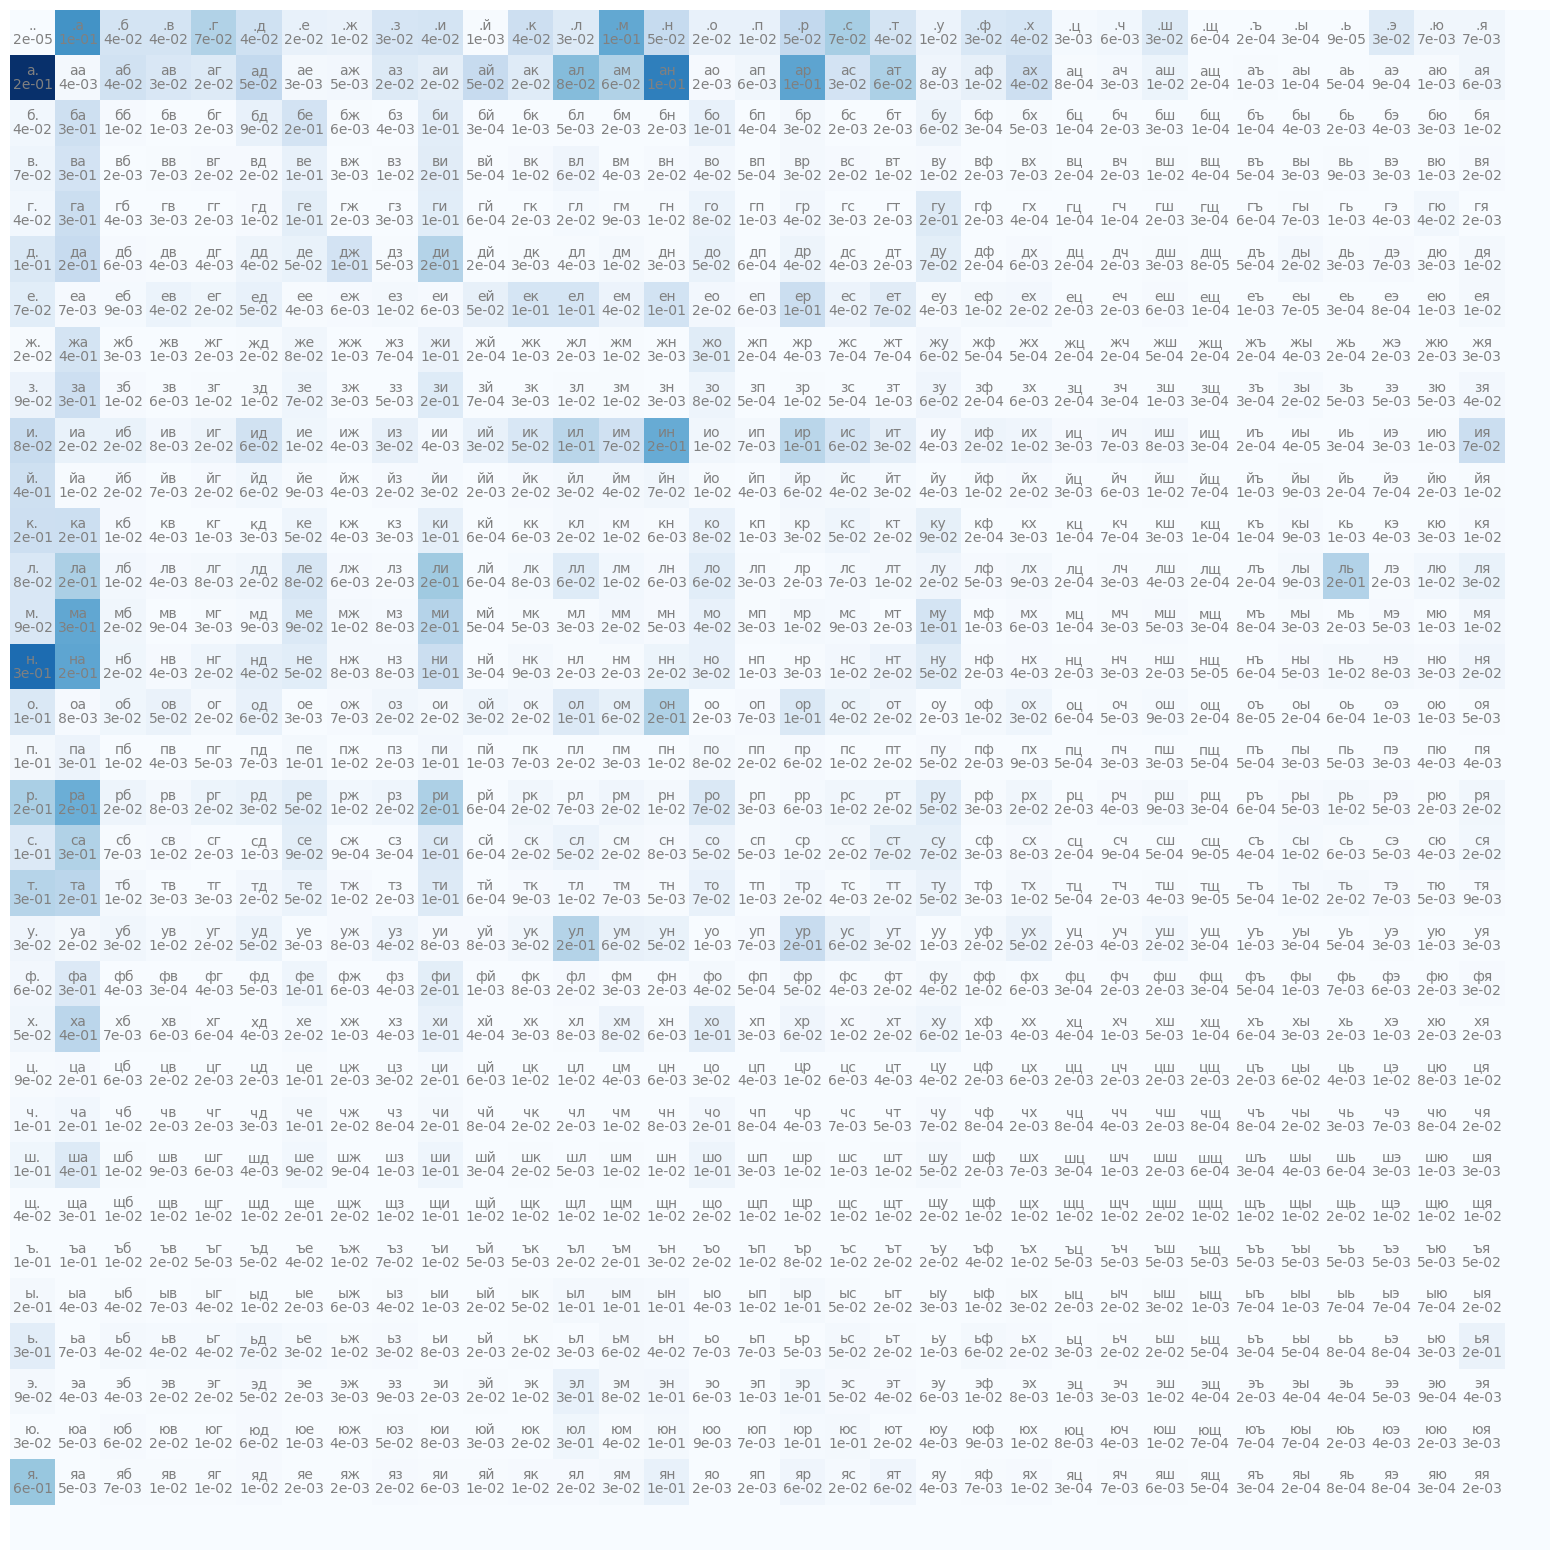

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(len(letters)):
    for j in range(len(letters)):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, f"{P[i, j].item():.0e}", ha="center", va="top", color='gray')
plt.axis('off');

In [154]:
g = torch.Generator().manual_seed(1000)

for i in range(20):
    out = ''
    curr_chr = '.'
    while True:
        p = P[stoi[curr_chr]]
        # i_chr = torch.randint(0, len(letters), (1, )).item() # что если будет равномерное распределение
        i_chr = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        curr_chr = itos[i_chr]
        if curr_chr == '.':
            print(out)
            break
        out += curr_chr


олдэ
я
гинаталинбейдджошулакн
ун
хор
с
га
джумуберисавай
мубинавл
беварменульфлухин
зиномиак
минсллангайизадеко
кране
бораралпе
кбаллсринаная
фра
ри
шозилнаи
л
ту


## E01: train a trigram language model
take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [251]:
words = open('data/names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

### Подсчёт

In [252]:
import torch
N = torch.zeros((len(stoi), len(stoi), len(stoi)), dtype=torch.int32) # len(stoi) = 27 в английских именах

In [254]:
for word in words[:1]:
    name = '.' + word + '.'
    for chr1, chr2, chr3 in zip(name, name[1:], name[2:]):
        print(chr1, chr2, chr3)
        ic1, ic2, ic3 = stoi[chr1], stoi[chr2], stoi[chr3]
        N[ic1, ic2, ic3] += 1

print(N)

. e m
e m m
m m a
m a .
tensor([[[  0,   0,   0,  ...,   0,   0,   0],
         [  0, 207, 190,  ...,  27, 173, 152],
         [  0, 169,   0,  ...,   0,   4,   0],
         ...,
         [  0,  57,   0,  ...,   1,  17,  11],
         [  0, 246,   0,  ...,   0,   0,   2],
         [  0, 456,   0,  ...,   0,  91,   1]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 40,   0,   5,  ...,   0,  20,  11],
         [ 36,  28,  20,  ...,   0,  12,   0],
         ...,
         [ 11,   5,   0,  ...,  17,   6,   3],
         [163, 389,  13,  ...,   0,  16,  40],
         [ 38, 123,   0,  ...,   0,  12,  22]],

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 46,   5,   5,  ...,   4,  31,   4],
         [  1,   8,   0,  ...,   0,   9,   0],
         ...,
         [  0,   0,   0,  ...,   0,   0,   0],
         [ 55,   4,   1,  ...,   0,   0,   0],
         [  0,   0,   0,  ...,   0,   0,   0]],

        ...,

        [[  0,   0,   0,  ...,   0,   0,   0],
         [ 10,   0,  

In [5]:
# параметр для регуляризации данных (сглаживает, делает вероятности не нулевыми)
# если сделать его больщим, будет равномерное распределение, так что его нужно оставлять маленьким
reg_param = 1
N = N + reg_param

In [6]:
# делаем распределение для первой буквы
P_first = N[stoi['.']].sum(dim=1, keepdim=True).squeeze()
P_first = P_first / P_first.sum()
P_first


tensor([0.0008, 0.1354, 0.0407, 0.0479, 0.0524, 0.0476, 0.0136, 0.0212, 0.0275,
        0.0189, 0.0748, 0.0913, 0.0488, 0.0783, 0.0358, 0.0129, 0.0165, 0.0036,
        0.0509, 0.0635, 0.0407, 0.0032, 0.0123, 0.0102, 0.0049, 0.0172, 0.0292])

In [7]:
P = N / N.sum(dim = 2, keepdim=True)

In [8]:
g = torch.Generator().manual_seed(2147483647+1)

for i in range(20):
    out = ""
    curr_chr1 = '.'
    ix = torch.multinomial(P_first, num_samples=1, replacement=True, generator=g).item()
    curr_chr2 = itos[ix]
    while True:
        if curr_chr2 == '.':
            print(out)
            break
        out += curr_chr2

        p = P[stoi[curr_chr1], stoi[curr_chr2]]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        curr_chr1 = curr_chr2
        curr_chr2 = itos[ix]
    


cam
ainor
slea
em
mon
eiagianaven
kair
uzana
kentham
jara
caylopharlyn
daw
dael
jua
elouryahikenjosey
betonevonjiann
is
kai
juoquissietterio
dyn


### Проверка на loglikehood

In [9]:
log_likelihood = 0.0
n = 0

for w in words:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    prob = P[ix1, ix2, ix3]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-410414.9688)
nll=tensor(410414.9688)
2.092747449874878


Получилось лучше, чем при bigram

Напишем функцию для вкидывания имён

In [14]:
def train_model_trigram(path, reg_param = 1):
    words = open(path, 'r').read().splitlines()
    chars = sorted(list(set(''.join(words))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}

    N = torch.zeros((len(stoi), len(stoi), len(stoi)), dtype=torch.int32) # len(stoi) = 27 в английских именах

    for word in words:
        name = '.' + word + '.'
        for chr1, chr2, chr3 in zip(name, name[1:], name[2:]):
            ic1, ic2, ic3 = stoi[chr1], stoi[chr2], stoi[chr3]
            N[ic1, ic2, ic3] += 1
    N = N + reg_param   

    # расрпеделение первой буквы
    P_first = N[stoi['.']].sum(dim=1, keepdim=True).squeeze()
    P_first = P_first / P_first.sum()
    
    # распределения по двум предыдущим
    P = N / N.sum(dim = 2, keepdim=True)
    return [P_first, P, itos, stoi]


def generate_n_names_trigram(n, model, seed = 2147483647):
    g = torch.Generator().manual_seed(seed)
    P_first, P, itos, stoi = model[0], model[1], model[2], model[3]

    for i in range(n):
        out = ""
        curr_chr1 = '.'
        ix = torch.multinomial(P_first, num_samples=1, replacement=True, generator=g).item()
        curr_chr2 = itos[ix]
        while True:
            if curr_chr2 == '.':
                print(out)
                break
            out += curr_chr2

            p = P[stoi[curr_chr1], stoi[curr_chr2]]
            ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
            curr_chr1 = curr_chr2
            curr_chr2 = itos[ix]

In [21]:
model_ru = train_model_trigram("data/russian_names.txt", 1)

In [23]:
generate_n_names_trigram(50, model_ru)

яфцйгул
анараз
ферена
авина
гимсунозимат
жам
фильнат
шамилдызый
гбгаилсцисэльтнатинаш
асулленемфмузае
гумме
пенят
мар
мадр
вета
шад
явела
альгин
гемикем
шехрианаттнзай
изомедозегжонемина
вил
рейна
емузауджунсть
иля
мешьь
мида
мимахрина
за
хан
миржон
газ
анасуа
малшо
бализя
иря
хамовь
кзамидашарах
ел
нгай
захтляуикимталодя
хон
надыкелбераджон
андасимчо
фил
огуллогщъойбаликпеыжзхадатсцжфьир
хамзрджандин
хаим
зариф
жуммцяотинабон


### Нейронка


In [96]:
words = open('data/names.txt', 'r').read().splitlines()

# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1, ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = ys.nelement()
print('number of examples: ', num)


number of examples:  196113


In [97]:
import torch.nn.functional as F

xs1 = len(stoi)*xs[:, 1] + xs[:, 0]
print(xs1)
xenc = F.one_hot(xs1, len(stoi)*len(stoi)).float()
xenc.shape

tensor([135, 356, 364,  ..., 701, 727, 674])


torch.Size([196113, 729])

In [98]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27*27, 27), generator=g, requires_grad=True)

In [109]:
# gradient descent
for k in range(10):
  
  # forward pass
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())  
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -200 * W.grad


IndexError: index 147087 is out of bounds for dimension 0 with size 1

In [110]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647+100)

for i in range(20):
  
  out = []
  ix1 = 0
  ix2 = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xs = ix2*27 + ix1
    xenc = F.one_hot(torch.tensor([xs]), num_classes=len(stoi)*len(stoi)).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix1 = ix2
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

yugh.
oni.
peny.
ourviraves.
ola.
.
zardisjsjpogthan.
ya.
omaria.
daely.
.
ofver.
taquan.
gedmqqjon.
yuris.
olla.
jayn.
iz.
norri.
norina.


## E02: split up the dataset randomly into 80% train set, 10% dev set, 10% test set.
Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [162]:
words = open('data/names.txt', 'r').read().splitlines()
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [163]:
import torch
from torch.utils.data import random_split

train_split = 0.8
validation_split = 0.1
test_split = 1 - train_split - validation_split

train_size = int(len(words) * train_split)
validation_size = int(len(words) * validation_split)
test_size = len(words) - train_size - validation_size

train_data, validation_data, test_data = random_split(words, [train_size, validation_size, test_size])
print(len(train_data), len(validation_data), len(test_data))

25626 3203 3204


In [164]:
# create the dataset
xs, ys = [], []
for w in train_data:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    xs.append([ix1, ix2])
    ys.append(ix3)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = ys.nelement()
print('number of examples: ', num)

number of examples:  156935


In [165]:
import torch.nn.functional as F

xs1 = len(stoi)*xs[:, 1] + xs[:, 0]
print(xs1)
xenc = F.one_hot(xs1, len(stoi)*len(stoi)).float()
xenc.shape

tensor([513,  46, 244,  ..., 383, 257, 144])


torch.Size([156935, 729])

In [166]:
# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
# W = torch.randn((27*27, 27), generator=g, requires_grad=True)
W = torch.load('data/tensors/W_optimized_trigram.pt')

In [7]:
# gradient descent
for k in range(100):
  
  # forward pass
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())  
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad


2.115443468093872
2.115330219268799
2.115226984024048
2.115131378173828
2.115042209625244
2.114957809448242
2.114877462387085
2.1148011684417725
2.114727735519409
2.114656686782837
2.114588499069214
2.1145224571228027
2.1144580841064453
2.1143953800201416
2.1143345832824707
2.1142749786376953
2.1142170429229736
2.1141600608825684
2.1141045093536377
2.1140501499176025
2.1139965057373047
2.1139438152313232
2.113892078399658
2.1138415336608887
2.1137919425964355
2.1137428283691406
2.113694667816162
2.1136465072631836
2.1135997772216797
2.113553762435913
2.1135079860687256
2.1134631633758545
2.1134188175201416
2.113374948501587
2.1133310794830322
2.113288402557373
2.113245964050293
2.113204002380371
2.1131627559661865
2.11312198638916
2.113081455230713
2.1130411624908447
2.1130013465881348
2.112962245941162
2.1129231452941895
2.112884283065796
2.1128458976745605
2.1128082275390625
2.1127703189849854
2.1127333641052246
2.112696409225464
2.1126596927642822
2.112623453140259
2.112586975097656

In [158]:
torch.save(W, 'data/tensors/W_optimized_trigram.pt')

Подсчёт ошибки для validation части

In [167]:
# create the dataset
x_valid, y_valid = [], []
for w in validation_data:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    x_valid.append([ix1, ix2])
    y_valid.append(ix3)
x_valid = torch.tensor(x_valid)
y_valid = torch.tensor(y_valid)
num = y_valid.nelement()
print('number of examples: ', num)

x_temp = len(stoi)*x_valid[:, 1] + x_valid[:, 0]
xenc = F.one_hot(x_temp, len(stoi)*len(stoi)).float()

logits = xenc @ W # predict log-counts
print(logits.shape)
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(num), y_valid].log().mean() + 0.01*(W**2).mean()
print(loss.item())  

number of examples:  19642
torch.Size([19642, 27])
2.112018585205078


## E03: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss.
What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?

In [30]:
def init_trigram(train_data, init_W = None):
    chars = sorted(list(set(''.join(train_data))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}

    xs, ys = [], []
    for w in train_data:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            ix3 = stoi[ch3]
            xs.append([ix1, ix2])
            ys.append(ix3)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    num = ys.nelement()

    xs1 = len(stoi)*xs[:, 1] + xs[:, 0]
    xenc = F.one_hot(xs1, len(stoi)*len(stoi)).float()

    if init_W is None:
        g = torch.Generator().manual_seed(2147483647)
        W = torch.randn((27*27, 27), generator=g, requires_grad=True)
        return [xenc, ys, W, num]
    else:
        W = torch.load('data/tensors/W_optimized_trigram.pt')
        return [xenc, ys, W, num]


def train_trigram(n, model, reg_param=0.01, alpha=10):
    xenc, ys, W, num = model[0], model[1], model[2], model[3]
    # gradient descent
    for k in range(n):
        
        # forward pass
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
        loss = -probs[torch.arange(num), ys].log().mean() + reg_param*(W**2).mean()
        print(loss.item())  
        
        # backward pass
        W.grad = None # set to zero the gradient
        loss.backward()
        
        # update
        W.data += -alpha * W.grad
    return [xenc, ys, W, num]


In [149]:
init = init_trigram(train_data, 1)
model = train_trigram(10, init, 0.01, 100)

2.0963282585144043
2.0963172912597656
2.096306085586548
2.0962953567504883
2.0962839126586914
2.0962729454040527
2.096262216567993
2.0962507724761963
2.0962398052215576
2.096229076385498


In [155]:
model = train_trigram(10, model, 0.01, 50)

2.096055507659912
2.0960500240325928
2.0960445404052734
2.096039295196533
2.096033811569214
2.0960285663604736
2.0960233211517334
2.096017837524414
2.096012592315674
2.0960075855255127


In [77]:
torch.save(model[2], 'data/tensors/W_optimized_trigram.pt')

In [156]:
# create the dataset
W = model[2]

x_valid, y_valid = [], []
for w in validation_data:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    ix3 = stoi[ch3]
    x_valid.append([ix1, ix2])
    y_valid.append(ix3)
x_valid = torch.tensor(x_valid)
y_valid = torch.tensor(y_valid)
num = y_valid.nelement()
print('number of examples: ', num)

x_temp = len(stoi)*x_valid[:, 1] + x_valid[:, 0]
xenc = F.one_hot(x_temp, len(stoi)*len(stoi)).float()

logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(num), y_valid].log().mean() + 0.01*(W**2).mean()
print(loss.item())  

number of examples:  19622
2.1255180835723877


## E04: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful.
Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

In [245]:
def init_trigram_no_one_hot(train_data, init_W = None):
    chars = sorted(list(set(''.join(train_data))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}

    xs, ys = [], []
    for w in train_data:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            ix3 = stoi[ch3]
            xs.append([ix1, ix2])
            ys.append(ix3)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)
    num = ys.nelement()


    if init_W is None:
        g = torch.Generator().manual_seed(2147483647)
        W = torch.randn((27, 27, 27), generator=g, requires_grad=True)
        return [xs, ys, W, num]
    else:
        W = torch.load('data/tensors/W_optimized_trigram_no_one_hot.pt')
        return [xs, ys, W, num]


def train_trigram_no_one_hot(n, model, reg_param=0.01, alpha=10):
    xs, ys, W, num = model[0], model[1], model[2], model[3]
    # gradient descent
    for k in range(n):
        
        # forward pass
        logits = W[xs[:, 0], xs[:, 1]] # predict log-counts
        # counts = logits.exp() # counts, equivalent to N
        # probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # loss = -probs[torch.arange(num), ys].log().mean() + reg_param*(W**2).mean()
        # print(loss.item())  
        loss = F.cross_entropy(logits, ys) + reg_param*(W**2).mean()
        print(loss.item())
        
        # backward pass
        W.grad = None # set to zero the gradient
        loss.backward()
        
        # update
        W.data += -alpha * W.grad
    return [xs, ys, W, num]

In [241]:
init = init_trigram_no_one_hot(train_data)
model = train_trigram_no_one_hot(10, init, 0.01, 100)

3.72239351272583
3.5739760398864746
3.4447243213653564
3.334474563598633
3.241994619369507
3.164480209350586
3.0985076427459717
3.0412533283233643
2.9908127784729004
2.945922613143921


In [247]:
model = train_trigram_no_one_hot(100, model, 0.01, 200)

2.1081244945526123
2.1080613136291504
2.1079978942871094
2.1079354286193848
2.107872486114502
2.1078102588653564
2.107748508453369
2.1076865196228027
2.1076254844665527
2.1075644493103027
2.1075034141540527
2.10744309425354
2.1073825359344482
2.1073224544525146
2.1072628498077393
2.107203483581543
2.107144355773926
2.1070854663848877
2.1070268154144287
2.1069681644439697
2.106910228729248
2.1068522930145264
2.106794834136963
2.1067373752593994
2.106680393218994
2.106623411178589
2.106567144393921
2.106510639190674
2.106454610824585
2.106398582458496
2.1063432693481445
2.106287956237793
2.1062328815460205
2.106177806854248
2.106123208999634
2.1060686111450195
2.1060147285461426
2.1059608459472656
2.1059072017669678
2.105853796005249
2.1058006286621094
2.105747699737549
2.1056950092315674
2.105642318725586
2.1055901050567627
2.1055381298065186
2.1054861545562744
2.1054346561431885
2.1053836345672607
2.105332136154175
2.105281114578247
2.1052305698394775
2.10517954826355
2.105129957199096

In [221]:
torch.save(model[2], 'data/tensors/W_optimized_trigram_no_one_hot.pt')

In [222]:
# проверка
A = torch.tensor([[1, 0, 0],
                 [1, 0, 0],
                 [0,0,1]])
B = torch.tensor([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 10, 11, 12]])

A @ B

tensor([[ 1,  2,  3,  4],
        [ 1,  2,  3,  4],
        [ 9, 10, 11, 12]])

### Генерация

In [249]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)
W = model[2]
for i in range(10):
  
  out = []
  ix1 = 0
  ix2 = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    
    logits = W[ix1, ix2] # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum() # probabilities for next character
    # ----------
    
    ix1 = ix2
    ix2 = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix2])
    if ix2 == 0:
      break
  print(''.join(out))

ounide.
ilyasid.
prelay.
ocin.
.
ohir.
toper.
oathen.
dannaaryanileniassibduinewin.
olse.


## E05: look up and use F.cross_entropy instead. 
You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

In [232]:
# Example of target with class indices
input = torch.randn(3, 5, requires_grad=True)
target = torch.randint(5, (3,), dtype=torch.int64)
print(input)
target

tensor([[-0.1573, -0.6855, -0.4541, -0.7686,  0.0734],
        [ 1.6866,  0.1291, -1.0843, -0.4341,  0.0407],
        [-1.9529,  0.8319, -0.0200,  0.3735,  0.7361]], requires_grad=True)


tensor([2, 3, 1])

In [233]:
loss = F.cross_entropy(input, target)
print(loss)
loss.backward()

tensor(1.8022, grad_fn=<NllLossBackward0>)


In [ ]:
# Example of target with class probabilities
input = torch.randn(3, 5, requires_grad=True)
target = torch.randn(3, 5).softmax(dim=1)
loss = F.cross_entropy(input, target)
loss.backward()

В E04 переделано

## E06: meta-exercise! 
Think of a fun/interesting exercise and complete it. В моём случае -- провернуть все финты ушами на русском языке

Попробую совместить bigram и trigram

In [275]:
def init_combine(train_data, init_W = None):
    chars = sorted(list(set(''.join(train_data))))
    stoi = {s:i+1 for i,s in enumerate(chars)}
    stoi['.'] = 0
    itos = {i:s for s,i in stoi.items()}

    xs, ys = [], []
    for w in train_data:
        chs = ['.'] + list(w) + ['.']
        for ch1, ch2, ch3 in zip(chs, chs[1:], chs[2:]):
            ix1 = stoi[ch1]
            ix2 = stoi[ch2]
            ix3 = stoi[ch3]
            xs.append([ix1, ix2])
            ys.append(ix3)
    xs = torch.tensor(xs)
    ys = torch.tensor(ys)


    if init_W is None:
        g = torch.Generator().manual_seed(2147483647)
        W_b = torch.randn((27, 27), generator=g, requires_grad=True)
        W_b_2 = torch.randn((27, 27), generator=g, requires_grad=True)
        W_t = torch.randn((27, 27, 27), generator=g, requires_grad=True)
        W_t_2 = torch.randn((27, 27), generator=g, requires_grad=True)
        return [xs, ys, W_b, W_t, W_b_2, W_t_2]


def train_combine(n, model, reg_param=0.01, alpha=10):
    xs, ys, W_b, W_t, W_b_2, W_t_2 = model[0], model[1], model[2], model[3], model[4], model[5]
    # gradient descent
    for k in range(n):
        
        # forward pass
        logits_t = W_t[xs[:, 0], xs[:, 1]] # predict log-counts
        probs_t = F.softmax(logits_t, dim=1)

        logits_b = W_b[xs[:, 1]]
        probs_b = F.softmax(logits_b, dim=1)

        logits_all = probs_t @ W_t_2 + probs_b @ W_b_2
        loss = F.cross_entropy(logits_all, ys) + reg_param*(W_b**2+W_t**2).mean()
        # counts = logits.exp() # counts, equivalent to N
        # probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
        # loss = -probs[torch.arange(num), ys].log().mean() + reg_param*(W**2).mean()
        # print(loss.item())  
    #     loss = F.cross_entropy(logits, ys) + reg_param*(W**2).mean()
        print(loss.item())
        
        # backward pass
        W_b.grad = None # set to zero the gradient
        W_t.grad = None
        W_b_2.grad = None
        W_t_2.grad = None
        loss.backward()
        
        # update
        W_b.data += -alpha * W_b.grad
        W_b_2.data += -alpha * W_b_2.grad
        W_t.data += -alpha * W_t.grad
        W_t_2.data += -alpha * W_t_2.grad
    return [xs, ys, W_b, W_t, W_b_2, W_t_2]

In [276]:
init = init_combine(train_data)
model = train_combine(10, init, 0.01, 100)

3.478583335876465
3.0311789512634277
2.8346590995788574
2.7530393600463867
2.70194411277771
2.6628100872039795
2.630737781524658
2.6035332679748535
2.5800256729125977
2.5594749450683594


In [307]:
model = train_combine(100, model, 0.01, 50)

2.132981061935425
2.1325185298919678
2.1324961185455322
2.1324737071990967
2.132450819015503
2.1324291229248047
2.132406711578369
2.132384777069092
2.1323626041412354
2.132340431213379
2.1323182582855225
2.132296562194824
2.1322743892669678
2.1322522163391113
2.132230520248413
2.1322081089019775
2.1321864128112793
2.132164239883423
2.1321425437927246
2.1321206092834473
2.13209867477417
2.1320767402648926
2.1320550441741943
2.132033109664917
2.132011651992798
2.1319897174835205
2.1319680213928223
2.131946086883545
2.1319243907928467
2.1319029331207275
2.13188099861145
2.131859302520752
2.1318376064300537
2.1318159103393555
2.1317942142486572
2.131772518157959
2.1317508220672607
2.1317291259765625
2.1317076683044434
2.131685972213745
2.131664276123047
2.1316428184509277
2.1316213607788086
2.1315994262695312
2.131577968597412
2.131556749343872
2.131535053253174
2.131514072418213
2.1314921379089355
2.1314706802368164
2.1314494609832764
2.131427764892578
2.131406545639038
2.13138484954834
2

К сожалению, это было глупо. Просто в trigram есть вся та же инфа, что и в bigram, ничего нового не добавится.